In [16]:
# --------------------------
# BLOQUE 1 · CARGA Y REVISIÓN INICIAL
# --------------------------
from pathlib import Path
import numpy as np
import pandas as pd
import re

BASE = Path.cwd()
DATA_RAW = BASE / "data" / "raw"
DATA_PROCESSED = BASE / "data" / "processed"
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

ARCHIVO = DATA_RAW / "GSAF5.csv"

df = pd.read_csv(ARCHIVO, encoding="latin-1")
print("Cargado:", df.shape)
df.head(5)


Cargado: (7045, 23)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,6th September,2025,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,...,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1st September,2025,Unprovoked,USA,Florida,Horseshoe reef Key Largo,Snorkeling,Richard Burrows,M,8,...,Not stated,Todd Smith: US SUN: NY Post: The Guardian: Peo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30th August,2025,Unprovoked,USA,Texas,Galveston,Swimming,Harper Ochoa,F,8,...,Not stated,Bob Myatt GSAF : People:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th August,2025,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17th August,2025,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Información general
df.info()
print("\nNulos (%):")
display((df.isna().mean().sort_values(ascending=False)*100).round(2).head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7045 entries, 0 to 7044
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7045 non-null   object 
 1   Year            7043 non-null   object 
 2   Type            7027 non-null   object 
 3   Country         6995 non-null   object 
 4   State           6560 non-null   object 
 5   Location        6478 non-null   object 
 6   Activity        6460 non-null   object 
 7   Name            6826 non-null   object 
 8   Sex             6466 non-null   object 
 9   Age             4051 non-null   object 
 10  Injury          7010 non-null   object 
 11  Fatal Y/N       6484 non-null   object 
 12  Time            3519 non-null   object 
 13  Species         3914 non-null   object 
 14  Source          7025 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

Unnamed: 21       99.99
Unnamed: 22       99.97
Time              50.05
Species           44.44
Age               42.50
Activity           8.30
Sex                8.22
Location           8.05
Fatal Y/N          7.96
State              6.88
href formula       3.56
href               3.53
Case Number.1      3.52
Case Number        3.51
pdf                3.49
original order     3.49
Name               3.11
Country            0.71
Injury             0.50
Source             0.28
dtype: float64

In [18]:
# --------------------------
# BLOQUE 2 · SELECCIÓN + TRADUCCIÓN DE COLUMNAS
# --------------------------
def pick(df, opts):
    for c in opts:
        if c in df.columns:
            return c
    return None

cols = {
    "Fecha":      pick(df, ["Date"]),
    "Año":        pick(df, ["Year"]),
    "País":       pick(df, ["Country"]),
    "Estado":     pick(df, ["State"]),
    "Área":       pick(df, ["Area"]),
    "Sexo":       pick(df, ["Sex"]),
    "Edad":       pick(df, ["Age"]),
    "Tipo":       pick(df, ["Type"]),
    "Provocado":  pick(df, ["Type"]),
    "Fatal":      pick(df, ["Fatal (Y/N)", "Fatal Y/N", "Fatal"]),
    "Hora":       pick(df, ["Time"]),
    "Especie":    pick(df, ["Species ", "Species"]),
    "Herida":     pick(df, ["Injury"])
}

cols = {k:v for k,v in cols.items() if v}
df = df[list(cols.values())].rename(columns={v:k for k,v in cols.items()})
print("Columnas traducidas:", df.columns.to_list())
df.head(5)


Columnas traducidas: ['Fecha', 'Año', 'País', 'Estado', 'Sexo', 'Edad', 'Provocado', 'Provocado', 'Fatal', 'Hora', 'Especie', 'Herida']


,Fecha,Año,País,Estado,Sexo,Edad,Provocado,Provocado,Fatal,Hora,Especie,Herida
0,6th September,2025,Australia,NSW,M,57,Unprovoked,Unprovoked,Y,0930hrs,Great White Shark,Both legs and arm severed
1,1st September,2025,USA,Florida,M,8,Unprovoked,Unprovoked,N,1524hrs,Not stated,Bite to leg
2,30th August,2025,USA,Texas,F,8,Unprovoked,Unprovoked,N,Not stated,Not stated,Bite to leg
3,18th August,2025,Australia,NSW,M,?,Unprovoked,Unprovoked,N,0730hrs,5m (16.5ft) Great White,None sustained board severly damaged
4,17th August,2025,Bahamas,Atlantic Ocean near Big Grand Cay,M,63,Unprovoked,Unprovoked,N,1300hrs,Undetermined,Severe injuries no detail


In [19]:
# --------------------------
# BLOQUE 3 · LIMPIEZA BÁSICA (ROBUSTO)
# --------------------------


# Por si acaso, ver qué columnas tenemos tras el bloque 2:
print("Columnas disponibles:", df.columns.to_list())

# 1) Duplicados
df = df.drop_duplicates().copy()

# 2) Tipos básicos (solo si existen)
if "Año" in df.columns:
    df["Año"] = pd.to_numeric(df["Año"], errors="coerce").astype("Int64")

if "Edad" in df.columns:
    df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce").astype("Int64")

if "Fecha" in df.columns:
    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce", dayfirst=True)

# 3) Sexo → M/F/NaN (solo si existe)
if "Sexo" in df.columns:
    df["Sexo"] = (
        df["Sexo"].astype(str).str.upper().str.strip()
        .replace({"M":"M", "F":"F", "":np.nan, "UNK":"", "UNKNOWN":""})
    )

# 4) Fatal → booleano (si existe y es texto); si no existe, la creamos como NaN
if "Fatal" in df.columns:
    if df["Fatal"].dtype == object:
        df["Fatal"] = (
            df["Fatal"].astype(str).str.strip()
            .map({"Y": True, "N": False, "y": True, "n": False})
        )
else:
    df["Fatal"] = np.nan

# 5) Tipo/Provocado (si existe 'Tipo'); si no, creamos ambas como NaN para no romper después
if "Tipo" in df.columns:
    df["Tipo"] = df["Tipo"].astype(str).str.lower().str.strip()
    # Provocado = True si contiene 'provoked', False si contiene 'unprovoked'
    df["Provocado"] = np.where(
        df["Tipo"].str.contains("provoked", na=False), True,
        np.where(df["Tipo"].str.contains("unprovoked", na=False), False, np.nan)
    )
else:
    df["Tipo"] = np.nan
    df["Provocado"] = np.nan

print("Limpieza básica OK. Shape:", df.shape)



Columnas disponibles: ['Fecha', 'Año', 'País', 'Estado', 'Sexo', 'Edad', 'Provocado', 'Provocado', 'Fatal', 'Hora', 'Especie', 'Herida']


C:\Users\cubea\AppData\Local\Temp\ipykernel_26476\317725933.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce", dayfirst=True)


Limpieza básica OK. Shape: (7033, 13)


In [20]:
# --------------------------
# BLOQUE 4 · HORA LIMPIA + MOMENTO DEL DÍA
# --------------------------

# Hora → número 0–23 (soporta formatos tipo "0930hrs", "13h00", etc.)
def limpiar_hora(x):
    if pd.isna(x): 
        return np.nan
    s = re.sub(r"[^0-9]", "", str(x))
    if len(s) >= 3:
        try:
            h = int(s[:2])
            return h if 0 <= h <= 23 else np.nan
        except:
            return np.nan
    return np.nan

if "Hora" in df.columns:
    df["Hora_limpia"] = df["Hora"].map(limpiar_hora).astype("Int64")
else:
    df["Hora_limpia"] = np.nan

# Momento del día a partir de Hora_limpia
def momento(h):
    if pd.isna(h): return np.nan
    h = int(h)
    if   0 <= h <= 5:   return "Madrugada"
    elif 6 <= h <= 11:  return "Mañana"
    elif 12 <= h <= 18: return "Tarde"
    elif 19 <= h <= 23: return "Noche"
    return np.nan

df["Momento_día"] = df["Hora_limpia"].map(momento)
print("Hora/Momento listos.")


Hora/Momento listos.


In [21]:
# --------------------------
# BLOQUE 5 · ESPECIES CLAVE (mapeo robusto)
# --------------------------
df["Especie"] = df["Especie"].astype(str).str.lower()

def especie_grupo(s):
    if pd.isna(s) or not s or s == "nan":
        return np.nan
    if any(k in s for k in ["great white", "white shark", "white pointer", "carcharodon carcharias"]):
        return "Blanco"
    if any(k in s for k in ["hammerhead", "sphyrna", "hammer head"]):
        return "Martillo"
    if any(k in s for k in ["tiger shark", "galeocerdo cuvier"]):
        return "Tigre"
    if any(k in s for k in ["bull shark", "carcharhinus leucas", "zambezi shark", "zambi", "bull-shark"]):
        return "Toro"
    return np.nan

df["Especie_grupo"] = df["Especie"].apply(especie_grupo)

print("Recuento por especie mapeada:")
display(df["Especie_grupo"].value_counts(dropna=False))


Recuento por especie mapeada:


Especie_grupo
NaN         5701
Blanco       711
Tigre        339
Toro         232
Martillo      50
Name: count, dtype: int64

In [22]:
especies_4 = ["Blanco", "Martillo", "Tigre", "Toro"]

df_4 = df[df["Especie_grupo"].isin(especies_4)].copy()
print("Filas con 4 especies elegidas:", df_4.shape)
display(df_4["Especie_grupo"].value_counts())


Filas con 4 especies elegidas: (1332, 16)


Especie_grupo
Blanco      711
Tigre       339
Toro        232
Martillo     50
Name: count, dtype: int64

In [23]:
# --------------------------
# BLOQUE 6 · CONJUNTO FINAL + QC
# --------------------------
# Completar 'Estado' con 'Área' si existe
if "Estado" in df.columns and "Área" in df.columns:
    df["Estado"] = df["Estado"].fillna(df["Área"])
    df_4["Estado"] = df_4["Estado"].fillna(df_4.get("Área"))

# Ubicación "País - Estado"
def construir_ubicacion(frame):
    if "País" in frame.columns and "Estado" in frame.columns:
        base = frame["País"].fillna("")
        comp = frame["País"].fillna("") + " - " + frame["Estado"].fillna("")
        frame["Ubicación"] = comp.where(frame["Estado"].notna(), base).str.strip(" -")
    else:
        frame["Ubicación"] = frame.get("País")
    return frame

df   = construir_ubicacion(df)
df_4 = construir_ubicacion(df_4)

# Conjunto mínimo de columnas (más "Herida" como contexto)
cols_min = [
    "Fecha","Año","País","Estado","Ubicación",
    "Sexo","Edad","Tipo","Provocado","Fatal",
    "Hora_limpia","Momento_día","Especie_grupo","Herida"
]
cols_min = [c for c in cols_min if c in df.columns]

df_final   = df[cols_min].drop_duplicates().reset_index(drop=True)
df_final_4 = df_4[[c for c in cols_min if c in df_4.columns]].drop_duplicates().reset_index(drop=True)

print("FINAL (todas):", df_final.shape, " | FINAL (4 especies):", df_final_4.shape)

print("\nNulos (% top 10) FINAL (4 especies):")
display((df_final_4.isna().mean().sort_values(ascending=False)*100).round(2).head(10))


FINAL (todas): (7029, 15)  | FINAL (4 especies): (1332, 15)

Nulos (% top 10) FINAL (4 especies):


Provocado      100.00
Provocado      100.00
Tipo           100.00
Hora_limpia     38.36
Momento_día     38.36
Edad            31.61
Fecha            9.53
Estado           3.53
Fatal            1.95
Herida           0.30
dtype: float64

In [24]:
from pathlib import Path
DATA_PROCESSED = Path("data/processed"); DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

df_final.to_csv(DATA_PROCESSED/"shark_attacks_final.csv", index=False, encoding="utf-8")
df_final_4.to_csv(DATA_PROCESSED/"shark_attacks_final_4especies.csv", index=False, encoding="utf-8")
print("Exportados a data/processed/")

print("\nTop especies (4):")
display(df_final_4["Especie_grupo"].value_counts())

print("\nAtaques por año (últimos 10):")
display(df_final_4.groupby("Año").size().tail(10))

print("\nTop 10 países (4 especies):")
display(df_final_4["País"].value_counts().head(10))


Exportados a data/processed/

Top especies (4):


Especie_grupo
Blanco      711
Tigre       339
Toro        232
Martillo     50
Name: count, dtype: int64


Ataques por año (últimos 10):


Año
2016    27
2017    36
2018    38
2019    24
2020    32
2021    20
2022    23
2023    21
2024    22
2025    18
dtype: int64


Top 10 países (4 especies):


País
USA              495
AUSTRALIA        293
SOUTH AFRICA     191
ITALY             26
BAHAMAS           24
REUNION           23
NEW ZEALAND       23
NEW CALEDONIA     22
BRAZIL            20
MEXICO            16
Name: count, dtype: int64

In [25]:
df_final_4

,Fecha,Año,País,Estado,Ubicación,Sexo,Edad,Tipo,Provocado,Provocado,Fatal,Hora_limpia,Momento_día,Especie_grupo,Herida
0,NaT,2025,Australia,NSW,Australia - NSW,M,57,NaN,NaN,NaN,True,9,Mañana,Blanco,Both legs and arm severed
1,NaT,2025,Australia,NSW,Australia - NSW,M,<NA>,NaN,NaN,NaN,False,7,Mañana,Blanco,None sustained board severly damaged
2,NaT,2025,Australia,NSW,Australia - NSW,M,9,NaN,NaN,NaN,False,16,Tarde,Blanco,None sustained board severely damaged
3,NaT,2025,Australia,South Australia,Australia - South Australia,M,19,NaN,NaN,NaN,False,11,Mañana,Blanco,Kayak badly damaged no injury to person
4,NaT,2025,Bahamas,Great Abaco Islands,Bahamas - Great Abaco Islands,M,66,NaN,NaN,NaN,False,<NA>,NaN,Toro,Lacerations to right arm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,NaT,0,USA,California,USA - California,F,<NA>,NaN,NaN,NaN,False,<NA>,NaN,Blanco,Leg injured
1328,NaT,0,NICARAGUA,Lake Nicaragua (fresh water),NICARAGUA - Lake Nicaragua (fresh water),M,<NA>,NaN,NaN,NaN,True,<NA>,NaN,Toro,"FATAL, leg severed"
1329,NaT,0,IRAQ,Basrah,IRAQ - Basrah,M,<NA>,NaN,NaN,NaN,True,<NA>,NaN,Toro,"FATAL, left leg bitten with severe blood loss"
1330,NaT,0,ITALY,Adriatic Sea,ITALY - Adriatic Sea,M,<NA>,NaN,NaN,NaN,False,<NA>,NaN,Blanco,No injury to occupant; shark capsized boat


In [26]:
df_final_4.columns

Index(['Fecha', 'Año', 'País', 'Estado', 'Ubicación', 'Sexo', 'Edad', 'Tipo',
       'Provocado', 'Provocado', 'Fatal', 'Hora_limpia', 'Momento_día',
       'Especie_grupo', 'Herida'],
      dtype='object')

In [27]:
# 1) Quitar nombres de columna duplicados (se queda con la primera aparición)
df_final_4 = df_final_4.loc[:, ~df_final_4.columns.duplicated()].copy()

# (si también tienes df_final para “todas las especies”, haz lo mismo)
try:
    df_final = df_final.loc[:, ~df_final.columns.duplicated()].copy()
except NameError:
    pass

# 2) Nos quedamos con el set limpio (12–13 columnas)
cols_finales = [
    "Fecha","Año","País","Estado",  
    "Sexo","Edad",
    "Provocado","Fatal",
    "Hora_limpia","Momento_día",
    "Especie_grupo","Herida"
]

# 3) Eliminar columnas sobrantes como 'Tipo' (y cualquier otra que no esté en la lista)
df_final_4 = df_final_4[[c for c in cols_finales if c in df_final_4.columns]].copy()
try:
    df_final = df_final[[c for c in cols_finales if c in df_final.columns]].copy()
except NameError:
    pass

print("Columnas df_final_4:", df_final_4.columns.to_list())
print("Shape df_final_4:", df_final_4.shape)


Columnas df_final_4: ['Fecha', 'Año', 'País', 'Estado', 'Sexo', 'Edad', 'Provocado', 'Fatal', 'Hora_limpia', 'Momento_día', 'Especie_grupo', 'Herida']
Shape df_final_4: (1332, 12)


In [28]:
from pathlib import Path
DATA_PROCESSED = Path("data/processed"); DATA_PROCESSED.mkdir(parents=True, exist_ok=True)

df_final_4.to_csv(DATA_PROCESSED/"shark_attacks_final_4especies_min.csv", index=False, encoding="utf-8")
try:
    df_final.to_csv(DATA_PROCESSED/"shark_attacks_final_min.csv", index=False, encoding="utf-8")
except NameError:
    pass

print("Guardados en:", DATA_PROCESSED)


Guardados en: data\processed


In [ ]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
os.makedirs("figures", exist_ok=True)

BLUE  = "#A5D8FF"
CORAL = "#FF6B6B"
INK   = "#0B132B"

data = df_final_4.copy() 


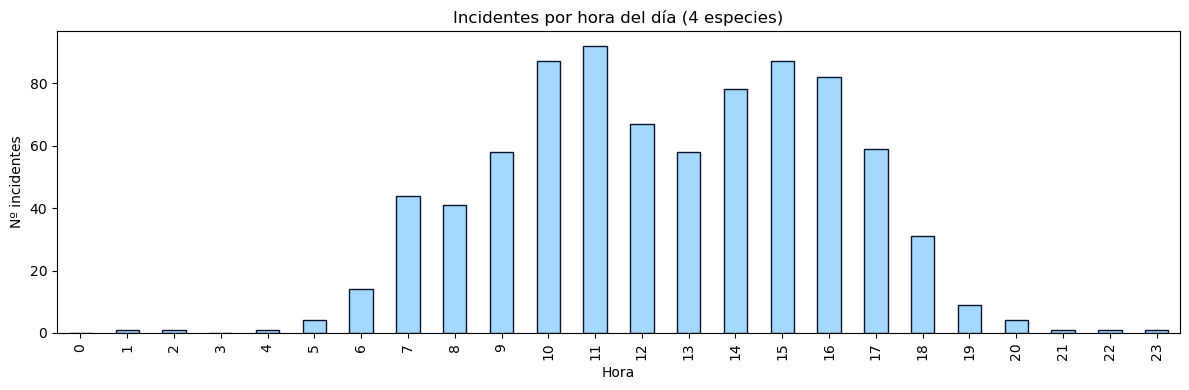

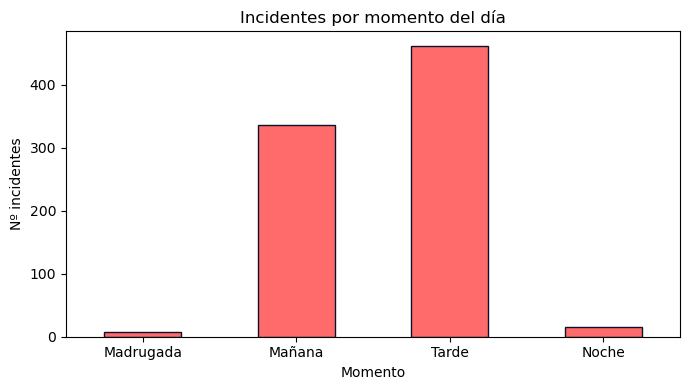

In [33]:
# Por hora (0–23)
if data['Hora_limpia'].notna().any():
    by_hour = data.groupby('Hora_limpia').size().reindex(range(24), fill_value=0)
    plt.figure(figsize=(12,4))
    by_hour.plot(kind='bar', color=BLUE, edgecolor=INK)
    plt.title("Incidentes por hora del día (4 especies)")
    plt.xlabel("Hora"); plt.ylabel("Nº incidentes")
    plt.tight_layout(); plt.savefig("figures/04_incidentes_por_hora.png", dpi=300); plt.show()

# Por momento del día
if 'Momento_día' in data.columns:
    cats = ["Madrugada","Mañana","Tarde","Noche"]
    by_moment = data['Momento_día'].astype(pd.CategoricalDtype(categories=cats, ordered=True)) \
                                   .value_counts().reindex(cats)
    plt.figure(figsize=(7,4))
    by_moment.plot(kind='bar', color=CORAL, edgecolor=INK)
    plt.title("Incidentes por momento del día")
    plt.xlabel("Momento"); plt.ylabel("Nº incidentes")
    plt.xticks(rotation=0)
    plt.tight_layout(); plt.savefig("figures/04b_incidentes_por_momento.png", dpi=300); plt.show()


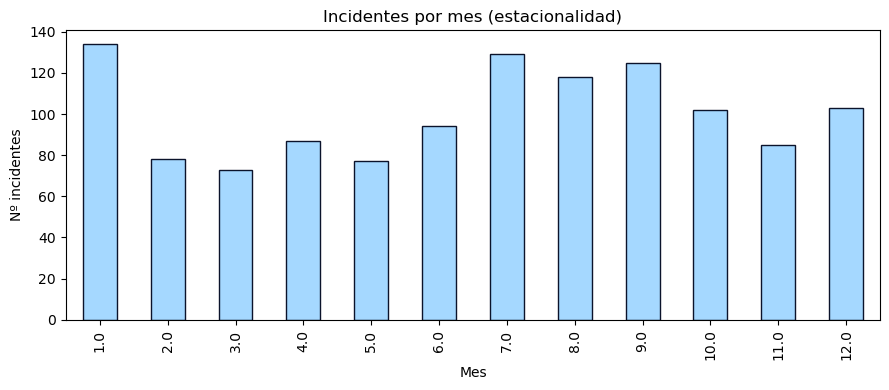

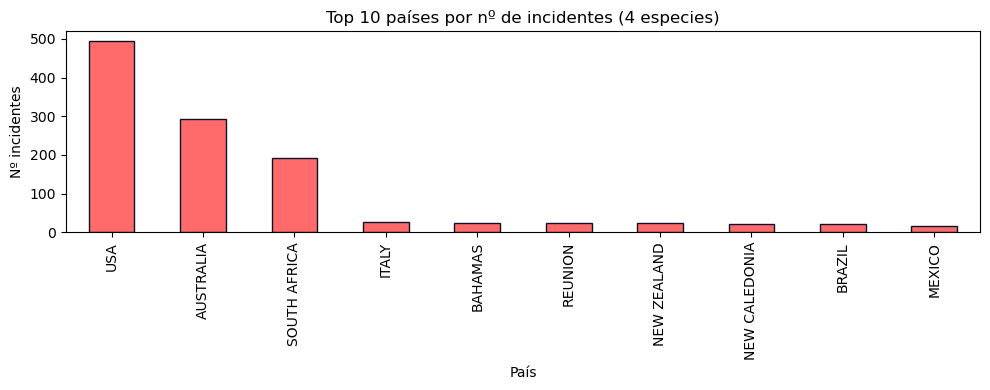

In [34]:
# Mes
mes = data['Fecha'].dt.month
by_month = mes.value_counts().sort_index()
plt.figure(figsize=(9,4))
by_month.plot(kind='bar', color=BLUE, edgecolor=INK)
plt.title("Incidentes por mes (estacionalidad)")
plt.xlabel("Mes"); plt.ylabel("Nº incidentes")
plt.tight_layout(); plt.savefig("figures/05_incidentes_por_mes.png", dpi=300); plt.show()

# Top países
top_paises = data['País'].value_counts().head(10)
plt.figure(figsize=(10,4))
top_paises.plot(kind='bar', color=CORAL, edgecolor=INK)
plt.title("Top 10 países por nº de incidentes (4 especies)")
plt.xlabel("País"); plt.ylabel("Nº incidentes")
plt.tight_layout(); plt.savefig("figures/05b_top10_paises.png", dpi=300); plt.show()


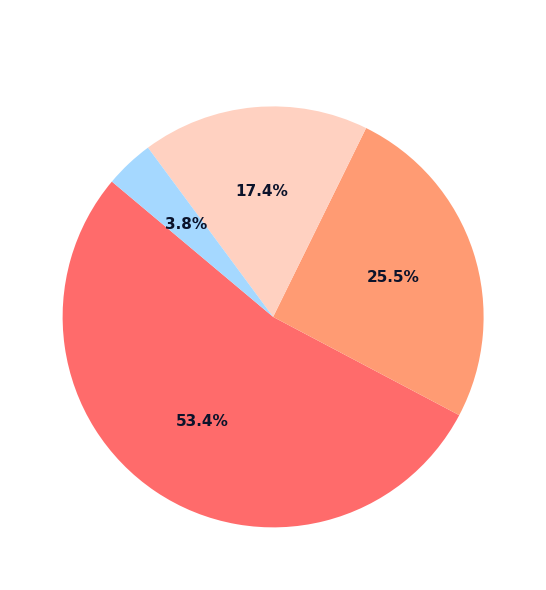

In [39]:
# --- Gráfico 1: Distribución de ataques por especie ---
cts = data["Especie_grupo"].value_counts().reindex(["Blanco","Tigre","Toro","Martillo"])
colors = [CORAL, "#FF9B73", "#FFD1C1", BLUE]

fig, ax = plt.subplots(figsize=(6,6), facecolor="none")
wedges, texts, autotexts = ax.pie(
    cts.values, labels=cts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    textprops={'color': 'white', 'fontsize': 11}
)

plt.setp(autotexts, size=11, weight="bold", color="#0B132B")
ax.set_title("Distribución de incidentes por especie", fontsize=14, pad=20, color="white")
plt.tight_layout()
plt.savefig("figures/01_especie_grupo_quesito.png", dpi=300, transparent=True)
plt.show()


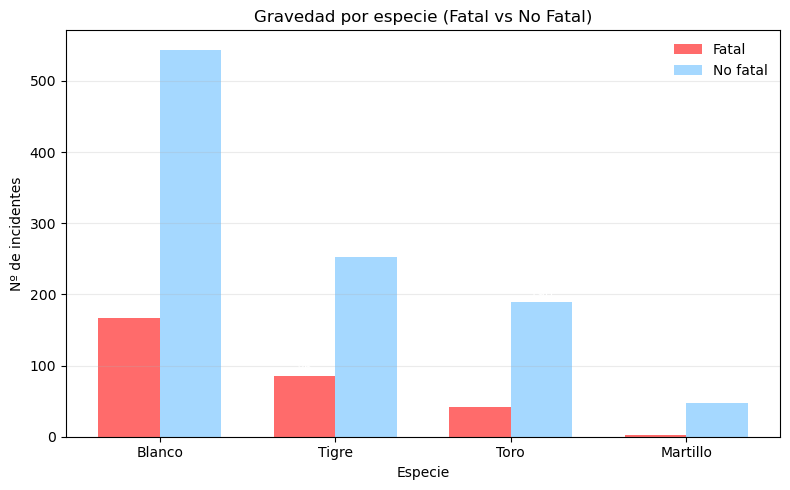

In [40]:
# --- Gráfico 2: Gravedad por especie ---
sev = (data
       .assign(Fatal_lbl=np.where(data["Fatal"]==True, "Fatal", "No fatal"))
       .groupby(["Especie_grupo","Fatal_lbl"])
       .size().unstack(fill_value=0)
       .reindex(["Blanco","Tigre","Toro","Martillo"]))

fig, ax = plt.subplots(figsize=(8,5))
width = 0.35
x = np.arange(len(sev))

bars1 = ax.bar(x - width/2, sev["Fatal"], width, label="Fatal", color=CORAL)
bars2 = ax.bar(x + width/2, sev["No fatal"], width, label="No fatal", color=BLUE)

ax.set_xticks(x)
ax.set_xticklabels(sev.index)
ax.set_xlabel("Especie"); ax.set_ylabel("Nº de incidentes")
ax.set_title("Gravedad por especie (Fatal vs No Fatal)")
ax.legend(frameon=False)
ax.grid(axis="y", alpha=0.25)

# Etiquetas
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                    f"{int(height)}", ha='center', va='bottom', fontsize=9, color="white")

plt.tight_layout()
plt.savefig("figures/02_gravedad_por_especie_grouped.png", dpi=300, transparent=True)
plt.show()


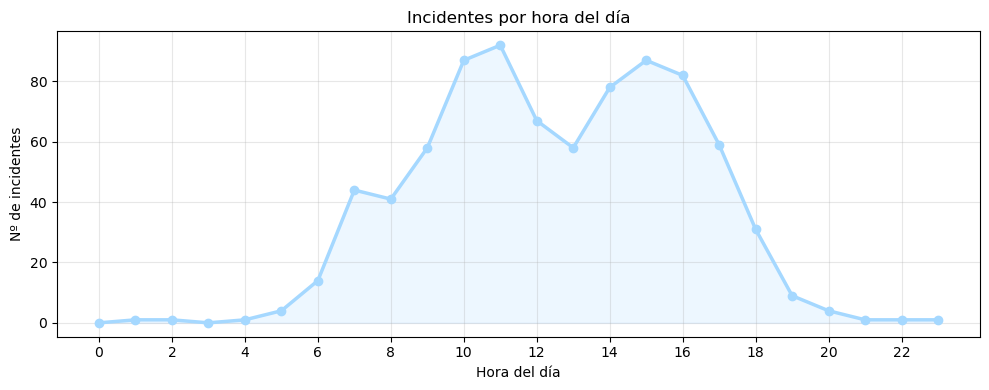

In [41]:
# --- Gráfico 3: Incidentes por hora del día ---
by_hour = data.groupby("Hora_limpia").size().reindex(range(24), fill_value=0)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(by_hour.index, by_hour.values, color=BLUE, linewidth=2.5, marker='o')
ax.fill_between(by_hour.index, by_hour.values, color=BLUE, alpha=0.2)
ax.set_xticks(range(0,24,2))
ax.set_title("Incidentes por hora del día")
ax.set_xlabel("Hora del día"); ax.set_ylabel("Nº de incidentes")
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("figures/03_hora_linea.png", dpi=300, transparent=True)
plt.show()


In [47]:
pip install geopandas pyproj shapely fiona

  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyproj-3.7.2-cp313-cp313-win_amd64.whl.metadata (31 kB)
  Using cached shapely-2.1.2-cp313-cp313-win_amd64.whl.metadata (7.1 kB)
  Using cached pyogrio-0.11.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
Using cached geopandas-1.1.1-py3-none-any.whl (338 kB)
Using cached pyproj-3.7.2-cp313-cp313-win_amd64.whl (6.3 MB)
Using cached shapely-2.1.2-cp313-cp313-win_amd64.whl (1.7 MB)
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   -------------------------- ------------- 16.0/24.5 MB 87.8 MB/s eta 0:00:01
   ---------------------------------------- 24.5/24.5 MB 81.0 MB/s eta 0:00:00
Using cached pyogrio-0.11.1-cp313-cp313-win_amd64.whl (19.2 MB)

   ---------------------------------------- 0/7 [shapely]
   ----- ---------------------------------- 1/7 [pyproj]
   ----------- ---------------------------- 2/7 [pyogrio]
   ----------- ---------------------------- 2/7 [pyogrio]
   -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [58]:
pip install geodatasets



   ---------------------------------------- 2/2 [geodatasets]

Note: you may need to restart the kernel to use updated packages.
